In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from copy import deepcopy 

class State:
    def __init__(self, row, col = None):
        if type(row) in (list, tuple):
            self.row = row[0]
            self.col = row[1]
        else:
            self.row = row
            self.col = col
        
    def __eq__(self, p):
        if isinstance(p, State):
            return (self.row == p.row) & (self.col == p.col)
        elif type(p) in (list, tuple):
            return (self.row == p[0]) & (self.col == p[1])            
        else:
            return super().__eq__(p)
        
    def getTuple(self):
        return (self.row, self.col)

    def __str__(self):
        return f'Row: {self.row}, Col: {self.col}'
    
    
class Simulator:
    """
    This class stores a data about the world, current policy and value 
    function. It also provides a bunch of methods that facilitate 
    RL-related operations visualizations.
    
    Properties:
        world    - numpy.array with the world. The numbers correspond to the
                   rewards for reaching each state
        policy   - numpy.array with policy. Policy is always deterministic. 
                   The numbers represent specific actions: 
                   0 (up), 1 (right), 2 (down), 3 (left)
        values   - numpy.array with the state-value function for each state
        reward   - aditional reward granted for performing each action
        terminal - a terminal state. It is an instance of the `State` class. 

    Methods:
        move      - Returns a state that is the result of an action
        getReward - returns the reward for entering a specific state
        getValue  - returns a Value function for a determined state
        getPolicy - returns a policy for a determined state
        setValue  - sets a Value function for a determined state
        setPolicy - sets a policy for a determined state
        plot      - visualizes the world, value function and policy.
    """

    
    
    def __init__(self, world = None, 
                 rows = None, cols = None, 
                 terminal = None, 
                 reward = 0, 
                 startPos = (0, 0)):
        """
        Arguments:
            world      - matrix (numpy array) with rewards for etering each state
            rows, cols - size of the world. Works only if world is None
            terminal   - tuple with coordinates of the terminal state
            reward     - additional reward for each movement
            startPos   - starting position
        """
        if world is None:
            self.world = np.zeros((x, y)) 
        else:
            self.world = world
        
        self.values = np.zeros(self.world.shape)
        self.policy = np.random.randint(low=0, high=4, size=world.shape)
        
        self.reward = reward
        
        if terminal is not None:
            self.terminal = State(terminal)
        else:
            self.terminal = None
        
        self.pos = State(startPos)
        
        # Used only to facilitate the plotting code
        self.plotFigsize = [x/2 for x in self.world.shape[::-1]]
        

        
    def action2num(self, action):
        """
        Assigns numeric value for an action
        Arguments:
            action - Allowed actions are L(eft), R(right), U(p), D(down)        
        Returns:
            1, 2, 3, 4 for U, R, D, L
        """
        if action in [0, 'U', 'Up', 'u', 'up']:
            return 0
        elif action in [1, 'R', 'Right', 'r', 'right']:
            return 1
        elif action in [2, 'D', 'Down', 'd', 'down']:
            return 2
        elif action in [3, 'L', 'Left', 'l', 'left']:
            return 3
       
        
    def move(self, start, action = None):
        """
            Returns a state that is the result of an action. If we are
            already in the terminal state, returns None
            Arguments:
                start - starting state (location). Can be defined as a 
                        State object or as a tuple (x, y) (col, row)
                action - if given, the action is performed. If None, 
                         the action is taken from the current policy.
            Returns:
                dest - a new location, after moving. An instance of a
                       State class.
        """

        if type(start) in [list, tuple]:
            start = State(start)
        
        if start == self.terminal:
            return None
        
        if action is None:
            action = self.getPolicy(start)
        
        dest = deepcopy(start)
            
        action = self.action2num(action)
            
        if action == 0:
            dest.row = max(start.row-1, 0)
        elif action == 1:
            dest.col = min(start.col+1, self.world.shape[1]-1)
        elif action == 2:
            dest.row = min(start.row+1, self.world.shape[0]-1)
        elif action == 3:
            dest.col = max(start.col-1, 0)
        
        return dest
        
    def execute(self, action):
        """
        Performs a given action. 
        THERE IS NO NEED TO USE THIS FUNCTION IN DP RELATED TASKS
        Arguments:
            action - Allowed actions are 0 (up), 1 (right), 2 (down), 3 (left)
        Returns:
            state, terminal, reward
        """
        self.pos = self.move(self.pos, action)

        if self.terminal is None:
            terminal = False
        else:
            terminal = self.terminal == self.pos
        
        
        return self.getState(), terminal, self.getReward()

    def getState(self):
        """
        Not implemented. No need to use this function in Dynamic Programming task.
        """
        return None
    
    
    def getValue(self, state):
        """
        Returns a Value function for a determined state (location)
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
        """
        if type(state) in (list, tuple):
            state = State(state)
            
        return self.values[state.row][state.col]

    def getPolicy(self, state):
        """
        Returns a policy function for a determined state (location).
        Policies  can be: 0 (up), 1 (right), 2 (down), 3 (left)
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
        """
        if type(state) in (list, tuple):
            state = State(state)
            
        return self.policy[state.row][state.col]
    
    
    def setValue(self, state, value):
        """
        Sets a Value function for a determined state (location).
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
            value - value to be set
        """        
        if type(state) in (list, tuple):
            state = State(state)
            
        self.values[state.row][state.col] = value
   
    def setPolicy(self, state, value):
        """
        Sets a policy function for a determined state (location).
        Policies  can be: 0 (up), 1 (right), 2 (down), 3 (left)
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
            value - value to be set
        """        
        if type(state) in (list, tuple):
            state = State(state)
            
        self.policy[state.row][state.col] = value



    def getReward(self, state = None):
        """
        Returns a reward for entering a determined state (location).
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
        """
        
        if state is None:
            state = self.pos
            
        if type(state) in (list, tuple):
            state = State(state)
                        
        return self.world[state.row][state.col] + self.reward
    
    
    def plot(self):
        """
        Wisualizes the world, value function and policy.
        """
        fig = plt.figure(figsize=(1.5 * self.world.shape[1], self.world.shape[0]/2))

        subfigs = fig.subfigures(1, 3)
        
        for outerind, subfig in enumerate(subfigs.flat):
            subfig.suptitle(f'Subfig {outerind}', y=0.1)
            
            if outerind == 0:
                self.plotWorld(subfig = subfig)
                subfig.suptitle('World', y=0.1)
            if outerind == 1:
                self.plotValues(subfig = subfig)
                subfig.suptitle('Values $v_\pi$', y=0.1)
            if outerind == 2:
                self.plotPolicy(subfig = subfig, show_world = True)
                subfig.suptitle('Policy $\pi$', y=0.1)

                
        plt.show()
    
    
    def plotValGrid(self, valmatrix, subfig = None, cmap = plt.cm.PuBu_r):
        """
        Visualizes numeric values.
        """
        if subfig is None:
            f, plothandles = plt.subplots(
                self.world.shape[0], self.world.shape[1], 
                sharex=True, sharey=True, 
                gridspec_kw = {'wspace' : 0, 'hspace' : 0},
                figsize = self.plotFigsize
            )
        else:
            plothandles = subfig.subplots(
                self.world.shape[0], self.world.shape[1], 
                gridspec_kw = {'wspace' : 0, 'hspace' : 0},
            )
                    
        valmin = valmatrix.min()
        valmax = valmatrix.max()
        norm = matplotlib.colors.Normalize(vmin=2*valmin, vmax=valmax)
        for row_h, row_v in zip (plothandles, valmatrix):
            for ax, val in zip (row_h, row_v):                                                
                ax.xaxis.set_visible(False)  # hide the x axis
                ax.yaxis.set_visible(False)  # hide the y axis
                
                if valmin == valmax:
                    bgcolor = 'white'
                else:
                    bgcolor=cmap(norm(val))
                ax.set_facecolor(bgcolor)
                ax.text(0.1, 0.4, f'{np.round(val, 1):.1f}')
                
        if self.terminal is not None:
            ax = plothandles[self.terminal.row][self.terminal.col]
            ax.set_facecolor('red')
            
        if subfig is None:
            plt.show()
            

    def plotWorld(self, subfig = None):
        """
        Visualizes the world.
        """
        self.plotValGrid(valmatrix = self.world, subfig = subfig)
            

    def plotValues(self, subfig = None):
        """
        Visualizes the state-value function.
        """        
        self.plotValGrid(valmatrix = self.values, subfig = subfig)

            
            
    def plotPolicy(self, show_world = False, subfig = None):
        """
        Visualizes the policy.
        """
        if subfig is None:
            f, plothandles = plt.subplots(
                self.policy.shape[0], self.policy.shape[1], 
                sharex=True, sharey=True, 
                gridspec_kw = {'wspace' : 0, 'hspace' : 0},
                figsize = self.plotFigsize
            )
        else:
            plothandles = subfig.subplots(
                self.policy.shape[0], self.policy.shape[1], 
                gridspec_kw = {'wspace' : 0, 'hspace' : 0},
            )
            
        if show_world:
            cmap = plt.cm.PuBu_r
            norm = matplotlib.colors.Normalize(vmin=2*self.world.min(), vmax=self.world.max())

        for row, (row_h, row_p) in enumerate(zip (plothandles, self.policy)):
            for col, (ax, action) in enumerate(zip (row_h, row_p)):                                                
                ax.xaxis.set_visible(False)  # hide the x axis
                ax.yaxis.set_visible(False)  # hide the y axis
                
                action = self.action2num(action)
                
                if action == 0:
                    arrow = r'$\uparrow$'
                elif action == 1:
                    arrow = r'$\rightarrow$'
                elif action == 2:
                    arrow = r'$\downarrow$'
                elif action == 3:
                    arrow = r'$\leftarrow$'

                if show_world:
                    bgcolor=cmap(norm(self.world[row][col]))
                    ax.set_facecolor(bgcolor)

                if ((row, col) == self.terminal):
                    ax.set_facecolor('red')
                else:
                    ax.plot(0.4, 0.4, linestyle='none', marker=arrow, color='red', markersize=10)
                    
        if subfig is None:
            plt.show()

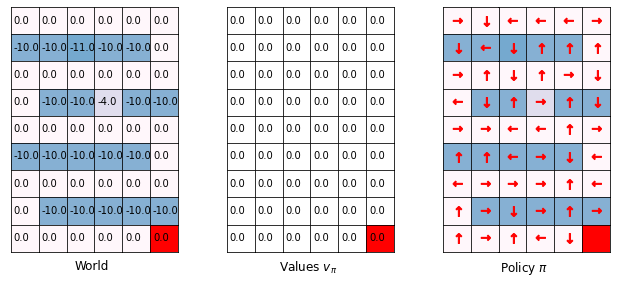

In [2]:
world = -np.array([
    [ 0,  0,  0,  0,  0,  0],
    [10, 10, 11, 10, 10,  0],
    [ 0,  0,  0,  0,  0,  0],
    [ 0, 10, 10,  4, 10, 10],
    [ 0,  0,  0,  0,  0,  0],
    [10, 10, 10, 10, 10,  0],    
    [ 0,  0,  0,  0,  0,  0],
    [ 0, 10, 10, 10, 10, 10],
    [ 0,  0, 0,   0,  0,  0],
])


simulator = Simulator(
    world = world, # Our World
    terminal = [x-1 for x in world.shape], # t. state in lower right corner
    reward = -1 # Reward for each step
    )

simulator.plot()

In [3]:
def policy_iteration(simulator, gamma, theta):
    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for row in range(simulator.world.shape[0]):
                for col in range(simulator.world.shape[1]):
                    old_value = simulator.values[row][col]
                    state = State(row, col)
                    new_value = 0
                    for action in range(4):
                        probabiblity = 1 if simulator.getPolicy(state) == action else 0
                        destination = simulator.move(state, action)
                        if destination is None:
                            reward = 0
                            destination = state
                        else:
                            reward = simulator.getReward(destination)
                        new_value += probabiblity * (reward + gamma * simulator.getValue(destination))
                    simulator.setValue(state, new_value)
                    delta = max(delta, abs(old_value - simulator.getValue(state)))
            if delta < theta:
                break
        
        # Policy Improvement
        policy_stable = True
        for row in range(simulator.world.shape[0]):
            for col in range(simulator.world.shape[1]):
                old_action = simulator.getPolicy(State(row, col))
                best_action = None
                best_value = float('-inf')
                for action in range(4):
                    destination = simulator.move(State(row, col), action)
                    if destination is None:
                        rew = 0
                        destination = State(row, col)
                    else:
                        reward = simulator.getReward(destination)
                    value = reward + gamma * simulator.getValue(destination)
                    if value > best_value:
                        best_value = value
                        best_action = action
                simulator.setPolicy(State(row, col), best_action)
                if best_action != old_action:
                    policy_stable = False
        if policy_stable: # (jezeli policy stable jest True - spelniony warunek)
            break
    return simulator.policy, simulator.values
                

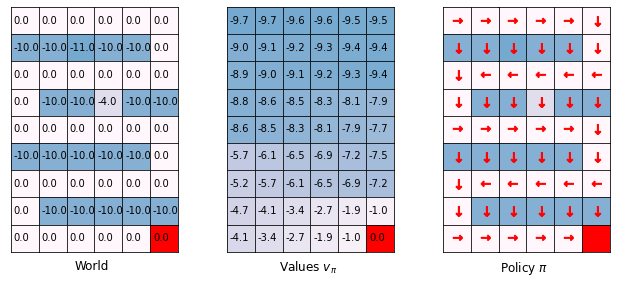

In [15]:
policy, values = policy_iteration(simulator, gamma = 0.9, theta = 0.0001)

# plot the world, value function, and policy
simulator.plot()